In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipympl
import pysam

import sys
sys.path.append("../../../src/")
import lakeview as lv

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 300

In [2]:
%matplotlib widget
plt.ioff()

In [3]:
REGION = "17:64040802-64045633"

ILLUMINA_BAM_PATH = (
    "data/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam"
)
ILLUMINA_BAM_URL = "https://s3.amazonaws.com/igv.org.demo/SKBR3/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam"
PACBIO_BAM_PATH = "data/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam"
PACBIO_BAM_URL = "https://s3.amazonaws.com/igv.org.demo/SKBR3/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam 17:64040802-64045633"

if os.path.isfile(ILLUMINA_BAM_PATH):
    illumina_painter = lv.SequenceAlignment.from_file(ILLUMINA_BAM_PATH, 'rb')
else:
    illumina_painter = lv.SequenceAlignment.from_file(ILLUMINA_BAM_URL, 'rb', region=REGION)
    
if os.path.isfile(PACBIO_BAM_PATH):
    pacbio_painter = lv.SequenceAlignment.from_file(PACBIO_BAM_PATH, 'rb')
else:
    pacbio_painter = lv.SequenceAlignment.from_file(PACBIO_BAM_URL, 'rb', region=REGION)

[E::idx_find_and_load] Could not retrieve index file for 'data/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam'
[E::idx_find_and_load] Could not retrieve index file for 'data/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam'
[E::idx_find_and_load] Could not retrieve index file for 'data/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam'
[E::idx_find_and_load] Could not retrieve index file for 'data/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam'


In [19]:
gv = lv.GenomeViewer(width=10, height=15, xlim=(64040802, 64045633))

illumina_colors = [
    "lightgray" if seg.is_proper_pair else "firebrick"
    for seg in illumina_painter.segments
]
illumina_groups = [0 if seg.is_forward else 1 for seg in illumina_painter.segments]
gv.add_track(illumina_painter.draw_pileup, 1)
gv.add_track(
    illumina_painter.draw_alignment, 8, colors=illumina_colors, groups=illumina_groups
)
gv.add_track(pacbio_painter.draw_pileup)
gv.add_track(
    pacbio_painter.draw_alignment, 8
)

In [21]:
gv

AppLayout(children=(VBox(children=(HBox(children=(Text(value='64,021,753 - 64,073,500', placeholder=''), Butto…

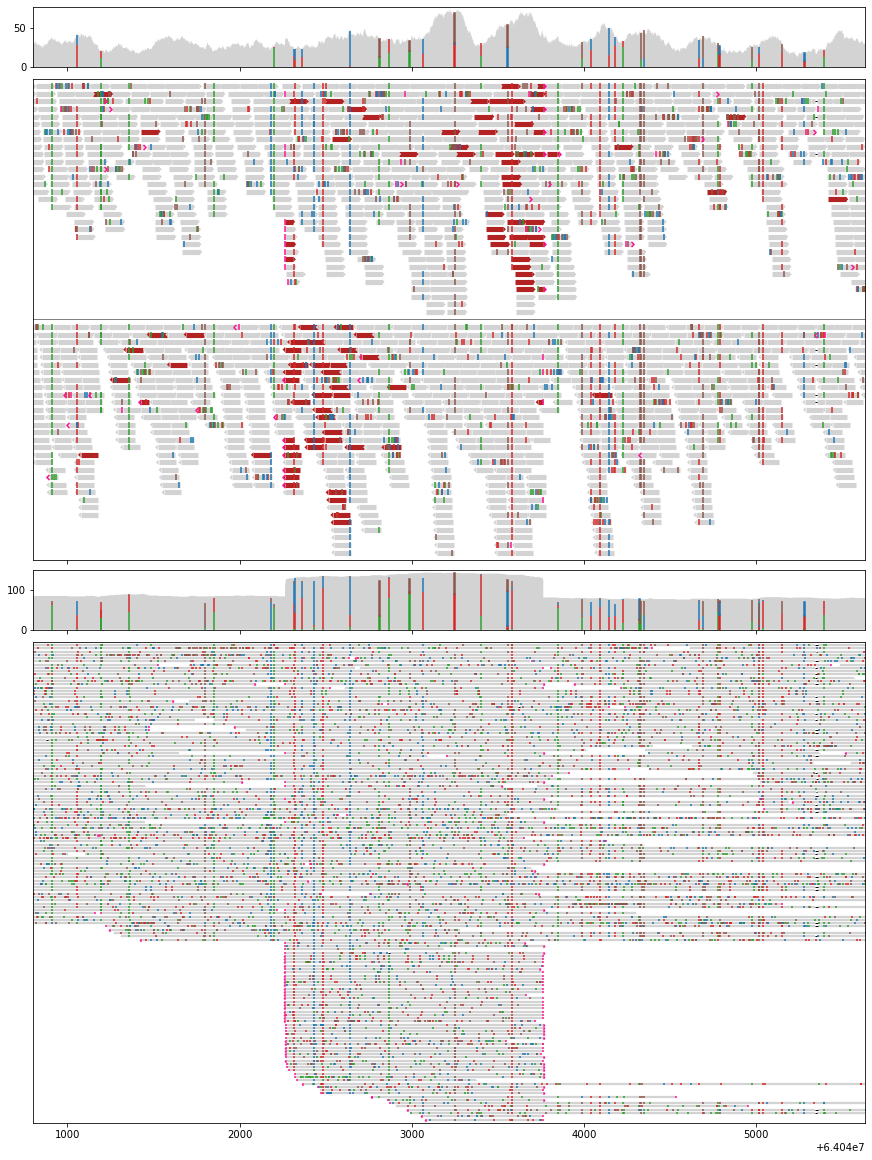

In [22]:
fig, ax_list = plt.subplots(
    4,
    1,
    figsize=(12, 16),
    gridspec_kw=dict(height_ratios=(1, 8, 1, 8)),
    constrained_layout=True,
    sharex=True,
)
illumina_painter.draw_pileup(ax_list[0])
illumina_painter.draw_alignment(
    ax_list[1], colors=illumina_colors, groups=illumina_groups, max_group_depth=30
)
pacbio_painter.draw_pileup(ax_list[2], min_mismatch_depth=10)
pacbio_painter.draw_alignment(ax_list[3])

ax_list[0].set_xlim(64040802, 64045633)
fig

In [4]:
BAM_PATH = ILLUMINA_BAM_PATH

In [7]:
plt.ion()

In [8]:
painter = lv.SequenceAlignment.from_file(BAM_PATH, "rb")

[E::idx_find_and_load] Could not retrieve index file for 'data/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam'
[E::idx_find_and_load] Could not retrieve index file for 'data/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam'


(64042000.0, 64044000.0)

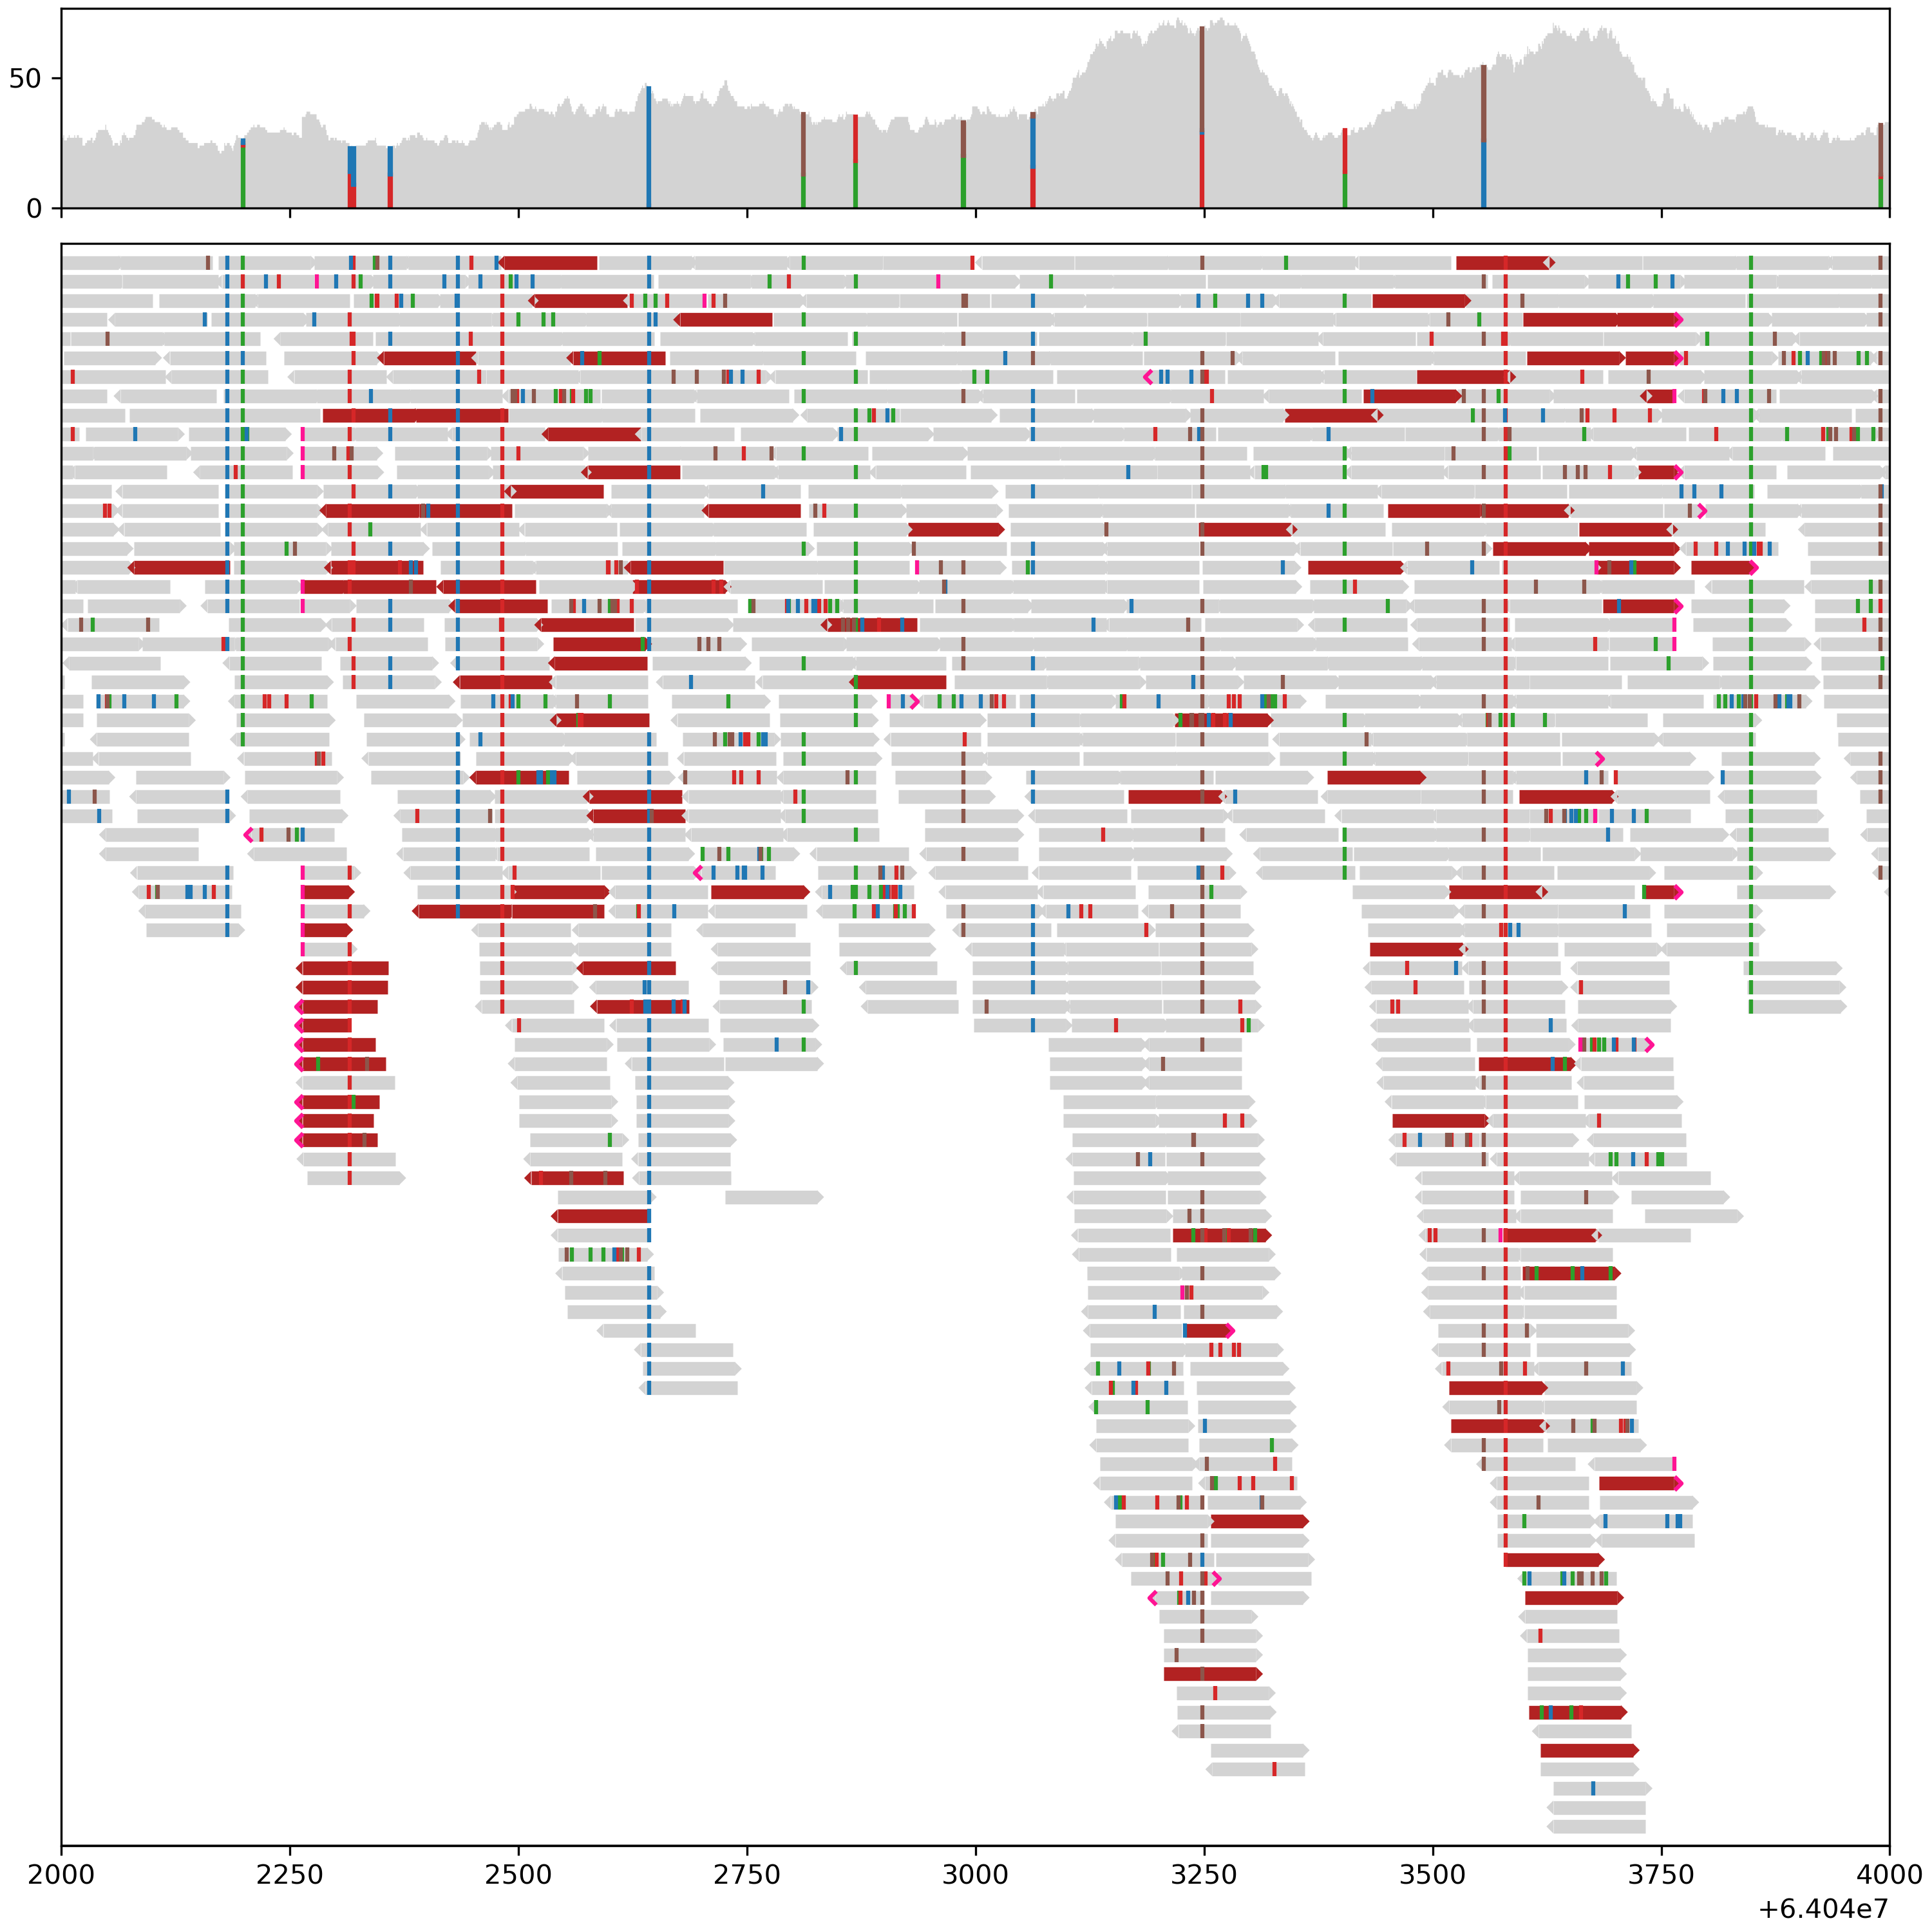

In [22]:
fig, (ax1, ax2) = plt.subplots(
    2,
    1,
    figsize=(10, 10),
    gridspec_kw=dict(height_ratios=(1, 8)),
    constrained_layout=True,
    sharex=True,
)
painter.draw_pileup(ax1)
painter.draw_alignment(
    ax2,
    colors=lambda segment: "lightgray" 
    if segment.is_proper_pair else "firebrick",
)
ax1.set_xlim(64042000, 64044000)

In [14]:
refseq_gff3 = "/users/silverstone/Downloads/GRCh37_latest_genomic.gff"
gencode_gtf = "/users/silverstone/Downloads/gencode.v40.annotation.gtf"

refseq_painter = lv.GeneAnnotation.from_file(
    refseq_gff3,
    format="gff",
    sequence_name="NC_000001.10",
    end=249250621 * 1.3,
    assume_sorted=True
)
gencode_painter = lv.GeneAnnotation.from_file(
    gencode_gtf,
    format="gtf",
    sequence_name="chr1",
    end=249250621 * 1.3,
    assume_sorted=True
)

In [6]:
fig, ax_list = plt.subplots(2, 1, figsize=(8, 3), sharex=True)

refseq_painter.draw_genes(ax_list[0], allow_overlaps=True)
gencode_painter.draw_genes(ax_list[1])

ax_list[0].set_xlim(0, 249250621 * 1.3)


(0.0, 324025807.3)

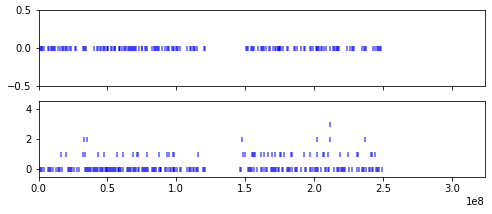

In [7]:
fig

In [7]:
refseq_painter.genes[:3]

[AnnotationRecord(sequence_name='NC_000001.10', source='BestRefSeq', feature='gene', start=17369, end=17436, score=None, strand='-', frame=None, attributes={'ID': 'gene-MIR6859-1', 'Dbxref': ['GeneID:102466751', 'HGNC:HGNC:50039', 'miRBase:MI0022705'], 'Name': 'MIR6859-1', 'description': 'microRNA 6859-1', 'gbkey': 'Gene', 'gene': 'MIR6859-1', 'gene_biotype': 'miRNA', 'gene_synonym': 'hsa-mir-6859-1'}, parent=None),
 AnnotationRecord(sequence_name='NC_000001.10', source='BestRefSeq', feature='gene', start=30366, end=30503, score=None, strand='+', frame=None, attributes={'ID': 'gene-MIR1302-2', 'Dbxref': ['GeneID:100302278', 'HGNC:HGNC:35294', 'miRBase:MI0006363'], 'Name': 'MIR1302-2', 'description': 'microRNA 1302-2', 'gbkey': 'Gene', 'gene': 'MIR1302-2', 'gene_biotype': 'miRNA', 'gene_synonym': ['hsa-mir-1302-2', 'MIRN1302-2']}, parent=None),
 AnnotationRecord(sequence_name='NC_000001.10', source='BestRefSeq', feature='gene', start=34611, end=36081, score=None, strand='-', frame=None,

In [6]:
gencode_painter.cdss[:3]

[AnnotationRecord(sequence_name='chr1', source='HAVANA', feature='CDS', start=65565, end=65573, score=None, strand='+', frame='0', attributes={'gene_id': 'ENSG00000186092.7', 'transcript_id': 'ENST00000641515.2', 'gene_type': 'protein_coding', 'gene_name': 'OR4F5', 'transcript_type': 'protein_coding', 'transcript_name': 'OR4F5-201', 'exon_number': '2', 'exon_id': 'ENSE00003813641.1', 'level': '2', 'protein_id': 'ENSP00000493376.2', 'hgnc_id': 'HGNC:14825', 'tag': 'appris_principal_1', 'havana_gene': 'OTTHUMG00000001094.4', 'havana_transcript': 'OTTHUMT00000003223.4'}, parent='ENST00000641515.2'),
 AnnotationRecord(sequence_name='chr1', source='HAVANA', feature='CDS', start=69037, end=70005, score=None, strand='+', frame='0', attributes={'gene_id': 'ENSG00000186092.7', 'transcript_id': 'ENST00000641515.2', 'gene_type': 'protein_coding', 'gene_name': 'OR4F5', 'transcript_type': 'protein_coding', 'transcript_name': 'OR4F5-201', 'exon_number': '3', 'exon_id': 'ENSE00003813949.1', 'level': 

In [ ]:
with open(refseq_gff3, "r") as f:
    refseq_records = lv.GeneAnnotation.parse_file(
        f,
        "gff",
        features=("gene", "transcript", "exon", "CDS"),
        sequence_name="NC_000001.10",
        end=249250621 * 1.3,
    )
with open(gencode_gtf, "r") as f:
    gencode_records = lv.GeneAnnotation.parse_file(
        f,
        "gtf",
        features=("gene", "transcript", "exon", "CDS"),
        sequence_name="chr1",
        end=249250621 * 1.3,
    )

In [6]:
[x for x in refseq_records if x.feature == 'CDS'][:3]

[AnnotationRecord(sequence_name='NC_000001.10', source='BestRefSeq', feature='CDS', start=65565, end=65573, score=None, strand='+', frame='0', attributes={'ID': 'cds-NP_001005484.2', 'Parent': 'rna-NM_001005484.2', 'Dbxref': ['CCDS:CCDS30547.1', 'GeneID:79501', 'Genbank:NP_001005484.2', 'HGNC:HGNC:14825'], 'Name': 'NP_001005484.2', 'gbkey': 'CDS', 'gene': 'OR4F5', 'product': 'olfactory receptor 4F5', 'protein_id': 'NP_001005484.2', 'tag': 'RefSeq Select'}),
 AnnotationRecord(sequence_name='NC_000001.10', source='BestRefSeq', feature='CDS', start=69037, end=70008, score=None, strand='+', frame='0', attributes={'ID': 'cds-NP_001005484.2', 'Parent': 'rna-NM_001005484.2', 'Dbxref': ['CCDS:CCDS30547.1', 'GeneID:79501', 'Genbank:NP_001005484.2', 'HGNC:HGNC:14825'], 'Name': 'NP_001005484.2', 'gbkey': 'CDS', 'gene': 'OR4F5', 'product': 'olfactory receptor 4F5', 'protein_id': 'NP_001005484.2', 'tag': 'RefSeq Select'}),
 AnnotationRecord(sequence_name='NC_000001.10', source='BestRefSeq', feature

In [18]:
[x for x in refseq_records if x.attributes['ID'] == "NM_001005484.2"][:3]

[]

In [19]:
!head -n 33 {refseq_gff3} 

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build GRCh37.p13
#!genome-build-accession NCBI_Assembly:GCF_000001405.25
#!annotation-date 03/07/2022
#!annotation-source NCBI Homo sapiens Updated Annotation Release 105.20220307
##sequence-region NC_000001.10 1 249250621
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=9606
NC_000001.10	RefSeq	region	1	249250621	.	+	.	ID=NC_000001.10:1..249250621;Dbxref=taxon:9606;Name=1;chromosome=1;gbkey=Src;genome=chromosome;mol_type=genomic DNA
NC_000001.10	BestRefSeq	pseudogene	11874	14409	.	+	.	ID=gene-DDX11L1;Dbxref=GeneID:100287102,HGNC:HGNC:37102;Name=DDX11L1;description=DEAD/H-box helicase 11 like 1 (pseudogene);gbkey=Gene;gene=DDX11L1;gene_biotype=transcribed_pseudogene;pseudo=true
NC_000001.10	BestRefSeq	transcript	11874	14409	.	+	.	ID=rna-NR_046018.2;Parent=gene-DDX11L1;Dbxref=GeneID:100287102,Genbank:NR_046018.2,HGNC:HGNC:37102;Name=NR_046018.2;gbkey=misc_RNA;gene=DDX11L1;product=DEAD/H-bo

In [20]:
refseq_records[:20]

[AnnotationRecord(sequence_name='NC_000001.10', source='BestRefSeq', feature='transcript', start=11874, end=14409, score=None, strand='+', frame=None, attributes={'ID': 'rna-NR_046018.2', 'Parent': 'gene-DDX11L1', 'Dbxref': ['GeneID:100287102', 'Genbank:NR_046018.2', 'HGNC:HGNC:37102'], 'Name': 'NR_046018.2', 'gbkey': 'misc_RNA', 'gene': 'DDX11L1', 'product': 'DEAD/H-box helicase 11 like 1 (pseudogene)', 'pseudo': 'true', 'transcript_id': 'NR_046018.2'}),
 AnnotationRecord(sequence_name='NC_000001.10', source='BestRefSeq', feature='exon', start=11874, end=12227, score=None, strand='+', frame=None, attributes={'ID': 'exon-NR_046018.2-1', 'Parent': 'rna-NR_046018.2', 'Dbxref': ['GeneID:100287102', 'Genbank:NR_046018.2', 'HGNC:HGNC:37102'], 'gbkey': 'misc_RNA', 'gene': 'DDX11L1', 'product': 'DEAD/H-box helicase 11 like 1 (pseudogene)', 'pseudo': 'true', 'transcript_id': 'NR_046018.2'}),
 AnnotationRecord(sequence_name='NC_000001.10', source='BestRefSeq', feature='exon', start=12613, end=1

In [21]:
gencode_records[:30]

[AnnotationRecord(sequence_name='chr1', source='HAVANA', feature='gene', start=11869, end=14409, score=None, strand='+', frame=None, attributes={'gene_id': 'ENSG00000223972.5', 'gene_type': 'transcribed_unprocessed_pseudogene', 'gene_name': 'DDX11L1', 'level': '2', 'hgnc_id': 'HGNC:37102', 'havana_gene': 'OTTHUMG00000000961.2'}),
 AnnotationRecord(sequence_name='chr1', source='HAVANA', feature='transcript', start=11869, end=14409, score=None, strand='+', frame=None, attributes={'gene_id': 'ENSG00000223972.5', 'transcript_id': 'ENST00000456328.2', 'gene_type': 'transcribed_unprocessed_pseudogene', 'gene_name': 'DDX11L1', 'transcript_type': 'processed_transcript', 'transcript_name': 'DDX11L1-202', 'level': '2', 'transcript_support_level': '1', 'hgnc_id': 'HGNC:37102', 'tag': 'basic', 'havana_gene': 'OTTHUMG00000000961.2', 'havana_transcript': 'OTTHUMT00000362751.1'}),
 AnnotationRecord(sequence_name='chr1', source='HAVANA', feature='exon', start=11869, end=12227, score=None, strand='+', 

In [22]:
from dataclasses import dataclass

In [23]:
@dataclass
class C:
    x: int
    y: int
    z: int

In [24]:
c = C(0, 1, 2)

In [25]:
list(c)

TypeError: 'C' object is not iterable

In [2]:
lv.alignment.pack_intervals([(1, 2), (3, 4), (1, 3)])

[0, 0, 1]